In [1]:
from datetime import datetime
print("Current Date/Time: ", datetime.now())

Current Date/Time:  2020-09-26 15:41:47.695735


In [2]:
!git clone https://github.com/swapniel99/ezio.git

fatal: destination path 'ezio' already exists and is not an empty directory.


In [3]:
%cd ezio

/content/ezio


In [4]:
import torch
import torch.optim as optim
from tqdm import tqdm
import numpy as np

!pip install torchsummary
from torchsummary import summary

from ezio.data import dataset 
from ezio.data.data_transforms.session_9 import transformations
from ezio.runner import engine
from ezio.utils import loss

In [5]:
# !pip install albumentations==0.4.6
!pip install -U git+https://github.com/albumentations-team/albumentations

  Cloning https://github.com/albumentations-team/albumentations to /tmp/pip-req-build-rd5_obi4
  Running command git clone -q https://github.com/albumentations-team/albumentations /tmp/pip-req-build-rd5_obi4
  Created wheel for albumentations: filename=albumentations-0.4.6-cp36-none-any.whl size=69177 sha256=e24c67b671489b3001cfcb2d9d6db6f476893f8149e6a796df9e7dee07cee89e
  Stored in directory: /tmp/pip-ephem-wheel-cache-tfuta0j7/wheels/6f/77/82/86baf8aeda64a6de0f890cd0f2fb31acaf5545cc9c99ad21ba
Successfully built albumentations
  Found existing installation: albumentations 0.4.6
    Uninstalling albumentations-0.4.6:
      Successfully uninstalled albumentations-0.4.6


In [6]:
train_transforms = transformations.perform_transformations(train=True, is_numpy=True)
test_transforms = transformations.perform_transformations(train=False, is_numpy=True)

In [7]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [8]:
train_set, valid_set = dataset.cifar10_dataset(train_transforms, test_transforms)

Extracting ./datasets/cifar-10-python.tar.gz to ./datasets
Files already downloaded and verified


In [9]:
train_loader, valid_loader = dataset.create_loaders(train_set, valid_set, train_batch_size=32, valid_batch_size=32, num_workers=4)

In [46]:
from ezio.model.session_9.QuizDNN import QuizDNN
model = QuizDNN().to(device)

In [47]:
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1          [-1, 128, 32, 32]           3,456
       BatchNorm2d-2          [-1, 128, 32, 32]             256
            Conv2d-3          [-1, 128, 32, 32]         147,456
       BatchNorm2d-4          [-1, 128, 32, 32]             256
            Conv2d-5          [-1, 128, 32, 32]         147,456
         MaxPool2d-6          [-1, 128, 16, 16]               0
       BatchNorm2d-7          [-1, 128, 16, 16]             256
            Conv2d-8          [-1, 128, 16, 16]         147,456
       BatchNorm2d-9          [-1, 128, 16, 16]             256
           Conv2d-10          [-1, 128, 16, 16]         147,456
      BatchNorm2d-11          [-1, 128, 16, 16]             256
           Conv2d-12          [-1, 128, 16, 16]         147,456
        MaxPool2d-13            [-1, 128, 8, 8]               0
      BatchNorm2d-14            [-1, 12

In [48]:
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=0, verbose=True, factor=0.5)
loss_function = loss.cross_entropy_loss()

In [49]:
train_acc, train_losses, test_acc, test_losses = engine.fit(model, train_loader, valid_loader, loss_function, device, optimizer, 40, scheduler)

  0%|          | 0/1563 [00:00<?, ?it/s]

EPOCH: 1


Loss=1.9765331745147705 Batch_id=1562 Accuracy=38.00: 100%|██████████| 1563/1563 [00:28<00:00, 53.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0454, Accuracy: 4891/10000 (48.91%)

EPOCH: 2


Loss=1.7827357053756714 Batch_id=1562 Accuracy=52.00: 100%|██████████| 1563/1563 [00:28<00:00, 54.18it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0327, Accuracy: 6270/10000 (62.70%)

EPOCH: 3


Loss=1.047621250152588 Batch_id=1562 Accuracy=58.00: 100%|██████████| 1563/1563 [00:28<00:00, 54.03it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0269, Accuracy: 6988/10000 (69.88%)

EPOCH: 4


Loss=1.3385741710662842 Batch_id=1562 Accuracy=63.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.31it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0239, Accuracy: 7381/10000 (73.81%)

EPOCH: 5


Loss=1.0875794887542725 Batch_id=1562 Accuracy=66.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0214, Accuracy: 7639/10000 (76.39%)

EPOCH: 6


Loss=1.036882758140564 Batch_id=1562 Accuracy=68.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.31it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0195, Accuracy: 7873/10000 (78.73%)

EPOCH: 7


Loss=0.6004081964492798 Batch_id=1562 Accuracy=70.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.35it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0188, Accuracy: 7911/10000 (79.11%)

EPOCH: 8


Loss=0.28939685225486755 Batch_id=1562 Accuracy=72.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0177, Accuracy: 8083/10000 (80.83%)

EPOCH: 9


Loss=1.1379492282867432 Batch_id=1562 Accuracy=73.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0172, Accuracy: 8137/10000 (81.37%)

EPOCH: 10


Loss=0.703973650932312 Batch_id=1562 Accuracy=74.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.33it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0158, Accuracy: 8280/10000 (82.80%)

EPOCH: 11


Loss=0.6602278351783752 Batch_id=1562 Accuracy=76.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.00it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0149, Accuracy: 8337/10000 (83.37%)

EPOCH: 12


Loss=0.7297689914703369 Batch_id=1562 Accuracy=76.00: 100%|██████████| 1563/1563 [00:27<00:00, 55.87it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0159, Accuracy: 8294/10000 (82.94%)

Epoch    12: reducing learning rate of group 0 to 5.0000e-03.
EPOCH: 13


Loss=0.659435510635376 Batch_id=1562 Accuracy=79.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.17it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0136, Accuracy: 8534/10000 (85.34%)

EPOCH: 14


Loss=0.43055516481399536 Batch_id=1562 Accuracy=80.00: 100%|██████████| 1563/1563 [00:27<00:00, 55.88it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 8519/10000 (85.19%)

EPOCH: 15


Loss=0.7709778547286987 Batch_id=1562 Accuracy=81.00: 100%|██████████| 1563/1563 [00:27<00:00, 55.93it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0134, Accuracy: 8546/10000 (85.46%)

EPOCH: 16


Loss=0.36141687631607056 Batch_id=1562 Accuracy=81.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.00it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0127, Accuracy: 8632/10000 (86.32%)

EPOCH: 17


Loss=1.1509562730789185 Batch_id=1562 Accuracy=81.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.53it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0129, Accuracy: 8632/10000 (86.32%)

Epoch    17: reducing learning rate of group 0 to 2.5000e-03.
EPOCH: 18


Loss=0.2957525849342346 Batch_id=1562 Accuracy=83.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.23it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0122, Accuracy: 8732/10000 (87.32%)

EPOCH: 19


Loss=0.3721035420894623 Batch_id=1562 Accuracy=83.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0119, Accuracy: 8760/10000 (87.60%)

EPOCH: 20


Loss=0.7291310429573059 Batch_id=1562 Accuracy=84.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0117, Accuracy: 8766/10000 (87.66%)

EPOCH: 21


Loss=0.3828190267086029 Batch_id=1562 Accuracy=84.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.40it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0116, Accuracy: 8784/10000 (87.84%)

EPOCH: 22


Loss=0.22350266575813293 Batch_id=1562 Accuracy=84.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.39it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0118, Accuracy: 8769/10000 (87.69%)

Epoch    22: reducing learning rate of group 0 to 1.2500e-03.
EPOCH: 23


Loss=0.8768677115440369 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.80it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0114, Accuracy: 8834/10000 (88.34%)

EPOCH: 24


Loss=0.413583904504776 Batch_id=1562 Accuracy=85.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.44it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8862/10000 (88.62%)

EPOCH: 25


Loss=0.5214506387710571 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8851/10000 (88.51%)

EPOCH: 26


Loss=0.177744522690773 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.38it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0112, Accuracy: 8839/10000 (88.39%)

Epoch    26: reducing learning rate of group 0 to 6.2500e-04.
EPOCH: 27


Loss=0.46681490540504456 Batch_id=1562 Accuracy=86.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.50it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0111, Accuracy: 8851/10000 (88.51%)

Epoch    27: reducing learning rate of group 0 to 3.1250e-04.
EPOCH: 28


Loss=0.20779064297676086 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 54.66it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8855/10000 (88.55%)

EPOCH: 29


Loss=0.12289395928382874 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 54.37it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8870/10000 (88.70%)

EPOCH: 30


Loss=0.6393049955368042 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.21it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8873/10000 (88.73%)

Epoch    30: reducing learning rate of group 0 to 1.5625e-04.
EPOCH: 31


Loss=0.4222133755683899 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 54.63it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0110, Accuracy: 8858/10000 (88.58%)

Epoch    31: reducing learning rate of group 0 to 7.8125e-05.
EPOCH: 32


Loss=0.35804784297943115 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.14it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8866/10000 (88.66%)

EPOCH: 33


Loss=0.35418832302093506 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.08it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8874/10000 (88.74%)

EPOCH: 34


Loss=0.48289233446121216 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.36it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0108, Accuracy: 8874/10000 (88.74%)

EPOCH: 35


Loss=0.4075113832950592 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:28<00:00, 55.13it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8872/10000 (88.72%)

Epoch    35: reducing learning rate of group 0 to 3.9063e-05.
EPOCH: 36


Loss=0.18489696085453033 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.04it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8867/10000 (88.67%)

Epoch    36: reducing learning rate of group 0 to 1.9531e-05.
EPOCH: 37


Loss=0.08628005534410477 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.54it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8885/10000 (88.85%)

Epoch    37: reducing learning rate of group 0 to 9.7656e-06.
EPOCH: 38


Loss=0.28969806432724 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.32it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8884/10000 (88.84%)

Epoch    38: reducing learning rate of group 0 to 4.8828e-06.
EPOCH: 39


Loss=0.4375075399875641 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.24it/s]
  0%|          | 0/1563 [00:00<?, ?it/s]


Test set: Average loss: 0.0109, Accuracy: 8869/10000 (88.69%)

Epoch    39: reducing learning rate of group 0 to 2.4414e-06.
EPOCH: 40


Loss=0.1859346628189087 Batch_id=1562 Accuracy=87.00: 100%|██████████| 1563/1563 [00:27<00:00, 56.06it/s]



Test set: Average loss: 0.0109, Accuracy: 8874/10000 (88.74%)

Epoch    40: reducing learning rate of group 0 to 1.2207e-06.


[[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa2286acc18>


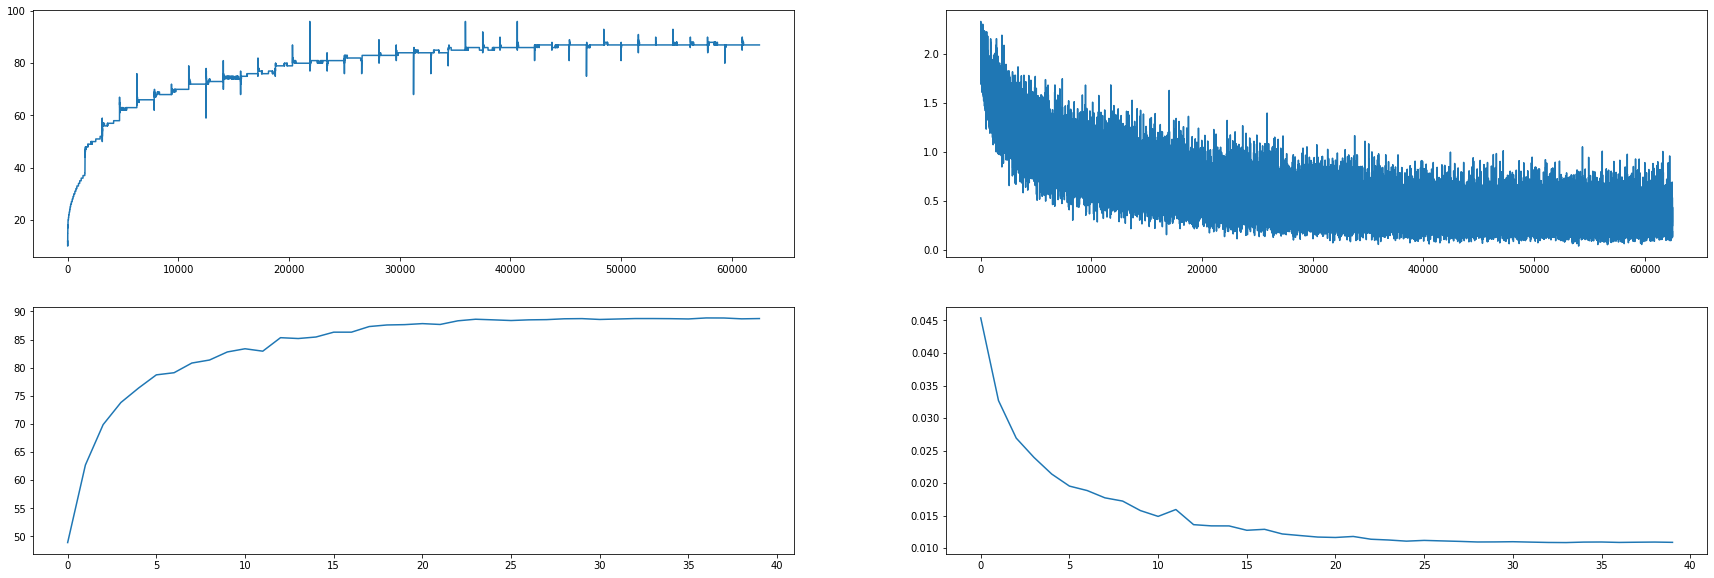

In [50]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2,2,figsize=(30,10))
print(axs)
axs[0][0].plot(train_acc, label = "train_acc")
axs[0][1].plot(train_losses, label = "train_losses")
axs[1][0].plot(test_acc, label = "test_acc")
axs[1][1].plot(test_losses, label = "test_losses")
# axs[0].legend()
# axs[0].set_title("Training Loss")